# Salary and Applications Corrolation

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the dataset
df = pd.read_csv('ai_ml_jobs_linkedin.csv')
# Drop rows where salary is NaN
df = df.dropna(subset=['salary'])
print(len(df))

862


In [12]:
df.head()

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector,...,company_name_one_hot,contract_one_hot_encoded,ex_levl_one_hot_encoded,work_type_one_hot_encoded,sector_one_hot_encoded,timestamp,title_one_hot_encoded,latitude,longitude,salary
0,ai/ml engineer,"new york, ny",2024-05-29,wesper,THE OPPORTUNITY\n\nWesper is looking for a sma...,Over 200 applicants,full-time,mid-senior level,engineering and information technology,internet publishing,...,"[False, False, False, False, False, False, Fal...","[False, True, False, False, False]","[False, False, False, False, False, True, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",1.716941e+09,"[False, False, False, False, False, False, Fal...",40.712728,-74.006015,60055.000000
1,software engineer - ai/ml systems,"redwood city, ca",NaN,snorkel ai,We're on a mission to democratize AI by buildi...,51 applicants,full-time,entry level,engineering and information technology,software development,...,"[False, False, False, False, False, False, Fal...","[False, True, False, False, False]","[False, False, True, False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",1.713355e+09,"[False, False, False, False, False, False, Fal...",37.486324,-122.232523,180000.000000
2,ml engineer at 100% remote,"san jose, ca",2024-06-01,elite mente llc,"Hello ,\n\nHope you are doing well!\n\nPlease ...",Be among the first 25 applicants,full-time,entry level,engineering and information technology,staffing and recruiting,...,"[False, False, False, False, False, False, Fal...","[False, True, False, False, False]","[False, False, True, False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",1.717200e+09,"[False, False, False, False, False, False, Fal...",37.336166,-121.890591,551597.032967
3,machine learning engineer (l4) - infrastructur...,"los gatos, ca",2024-05-19,netflix,At Netflix our goal is to entertain the world....,Over 200 applicants,full-time,not applicable,engineering and information technology,"entertainment providers, technology, informati...",...,"[False, False, False, False, False, False, Fal...","[False, True, False, False, False]","[False, False, False, False, False, False, True]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",1.716077e+09,"[False, False, False, False, False, False, Fal...",37.226611,-121.974680,445000.000000
4,data scientist / ml engineer,"redwood city, ca",NaN,"paradyme, inc.",Overview\n\nParadyme Management is a rapidly g...,110 applicants,full-time,entry level,engineering and information technology,it services and it consulting,...,"[False, False, False, False, False, False, Fal...","[False, True, False, False, False]","[False, False, True, False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",1.713355e+09,"[False, False, False, False, False, False, Fal...",37.486324,-122.232523,551597.032967


In [13]:
# Function to extract number from application count text
def extract_applications(text):
    if pd.isna(text):
        return np.nan
    # Extract any number from text
    number = ''.join(filter(str.isdigit, text))
    if number:
        return int(number)
    return np.nan

# Create new column with extracted application counts
counts = [extract_applications(app) for app in df['applicationsCount']]
df['applications'] = counts


/var/folders/jp/0qxw3rzx5bd_4wwrng4x9r600000gn/T/ipykernel_75398/2298214496.py:20: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()
/var/folders/jp/0qxw3rzx5bd_4wwrng4x9r600000gn/T/ipykernel_75398/2298214496.py:20: UserWarning: Glyph 147 (\x93) missing from current font.
  plt.tight_layout()
/var/folders/jp/0qxw3rzx5bd_4wwrng4x9r600000gn/T/ipykernel_75398/2298214496.py:20: UserWarning: Glyph 148 (\x94) missing from current font.
  plt.tight_layout()
/var/folders/jp/0qxw3rzx5bd_4wwrng4x9r600000gn/T/ipykernel_75398/2298214496.py:20: UserWarning: Glyph 159 (\x9f) missing from current font.
  plt.tight_layout()
/var/folders/jp/0qxw3rzx5bd_4wwrng4x9r600000gn/T/ipykernel_75398/2298214496.py:20: UserWarning: Glyph 154 (\x9a) missing from current font.
  plt.tight_layout()
/var/folders/jp/0qxw3rzx5bd_4wwrng4x9r600000gn/T/ipykernel_75398/2298214496.py:20: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()
/var/folders/jp/0qxw3rzx5bd_4wwrng

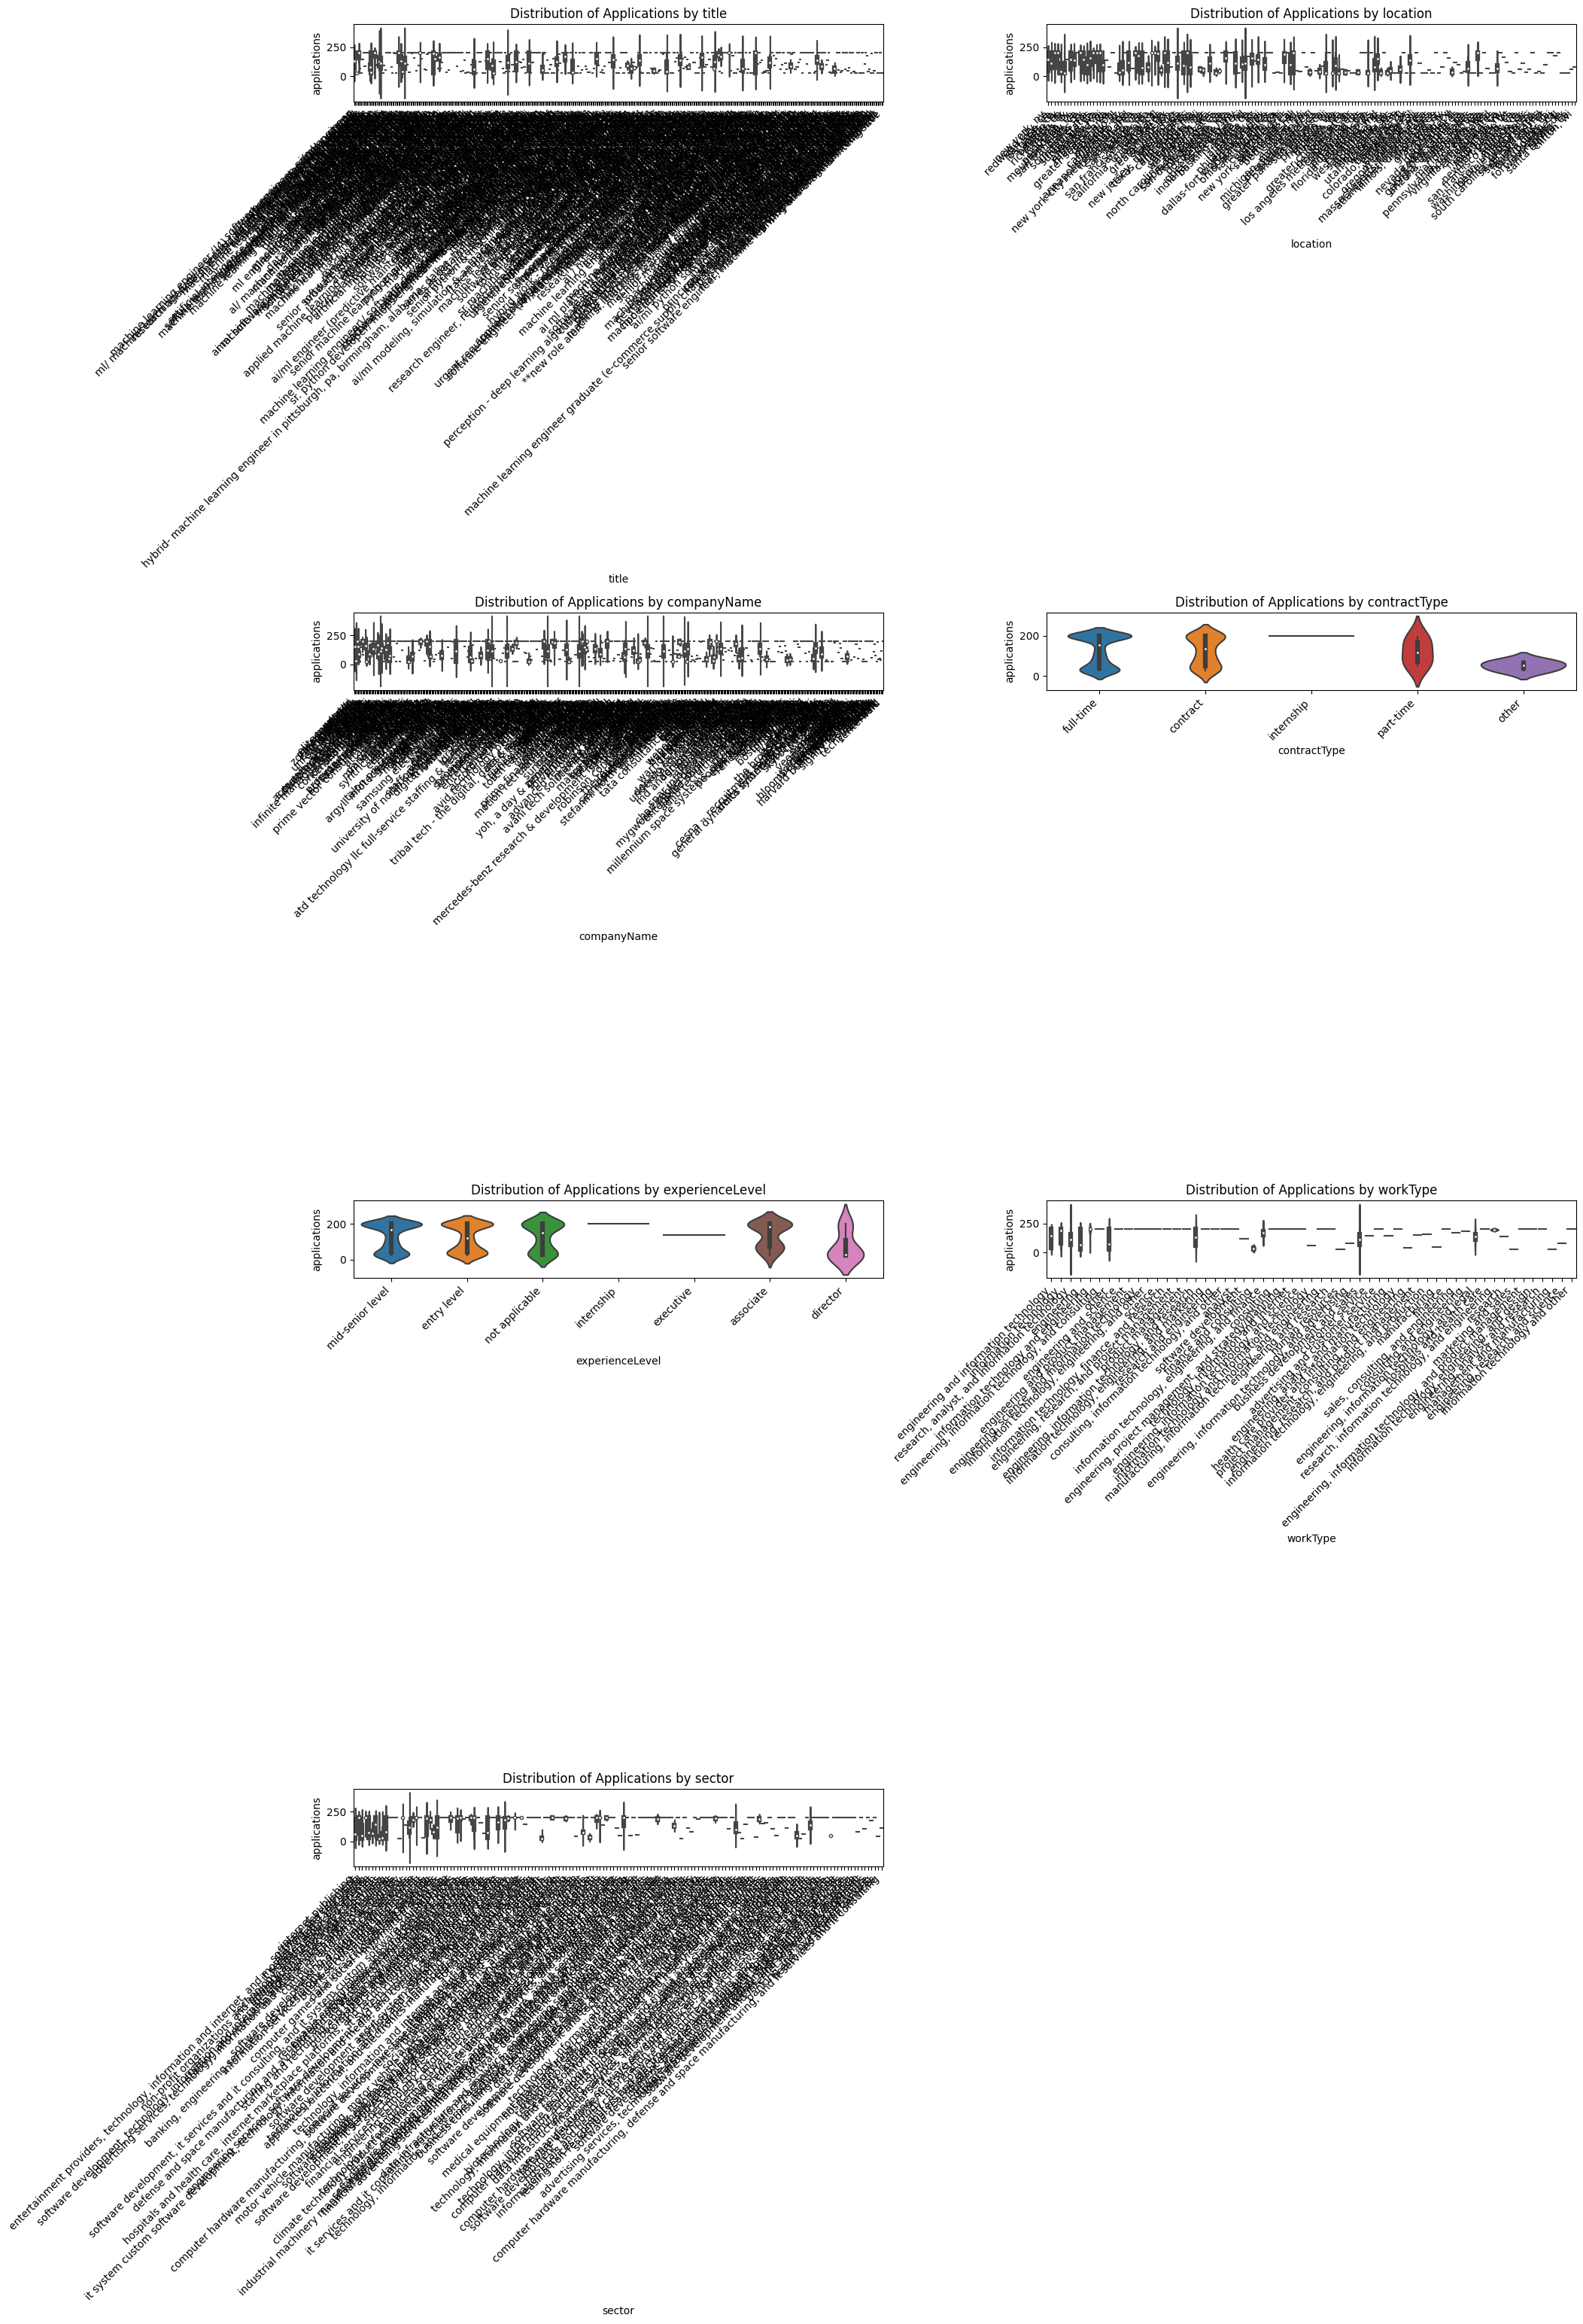


Features ranked by their ability to distinguish application numbers (based on between-group variance):
title: 5059.86
companyName: 4888.20
location: 4161.81
workType: 3314.98
sector: 3216.18
contractType: 2217.64
experienceLevel: 1173.60


In [14]:
# Features to analyze (excluding applications and description)
features = ['title', 'location', 'companyName', 'contractType', 'experienceLevel', 'workType', 'sector']

# Create subplots for each feature
plt.figure(figsize=(20, 25))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    
    # Create violin plot
    sns.violinplot(data=df, x=feature, y='applications')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Set title
    plt.title(f'Distribution of Applications by {feature}')
    
    # Adjust layout to prevent label overlap
    plt.tight_layout()

plt.show()

# Calculate variance of applications for each feature group to quantify distinction power
variance_results = {}
for feature in features:
    group_means = df.groupby(feature)['applications'].mean()
    variance = np.var(group_means)
    variance_results[feature] = variance

# Sort and display features by their ability to distinguish applications
sorted_features = dict(sorted(variance_results.items(), key=lambda x: x[1], reverse=True))
print("\nFeatures ranked by their ability to distinguish application numbers (based on between-group variance):")
for feature, variance in sorted_features.items():
    print(f"{feature}: {variance:.2f}")


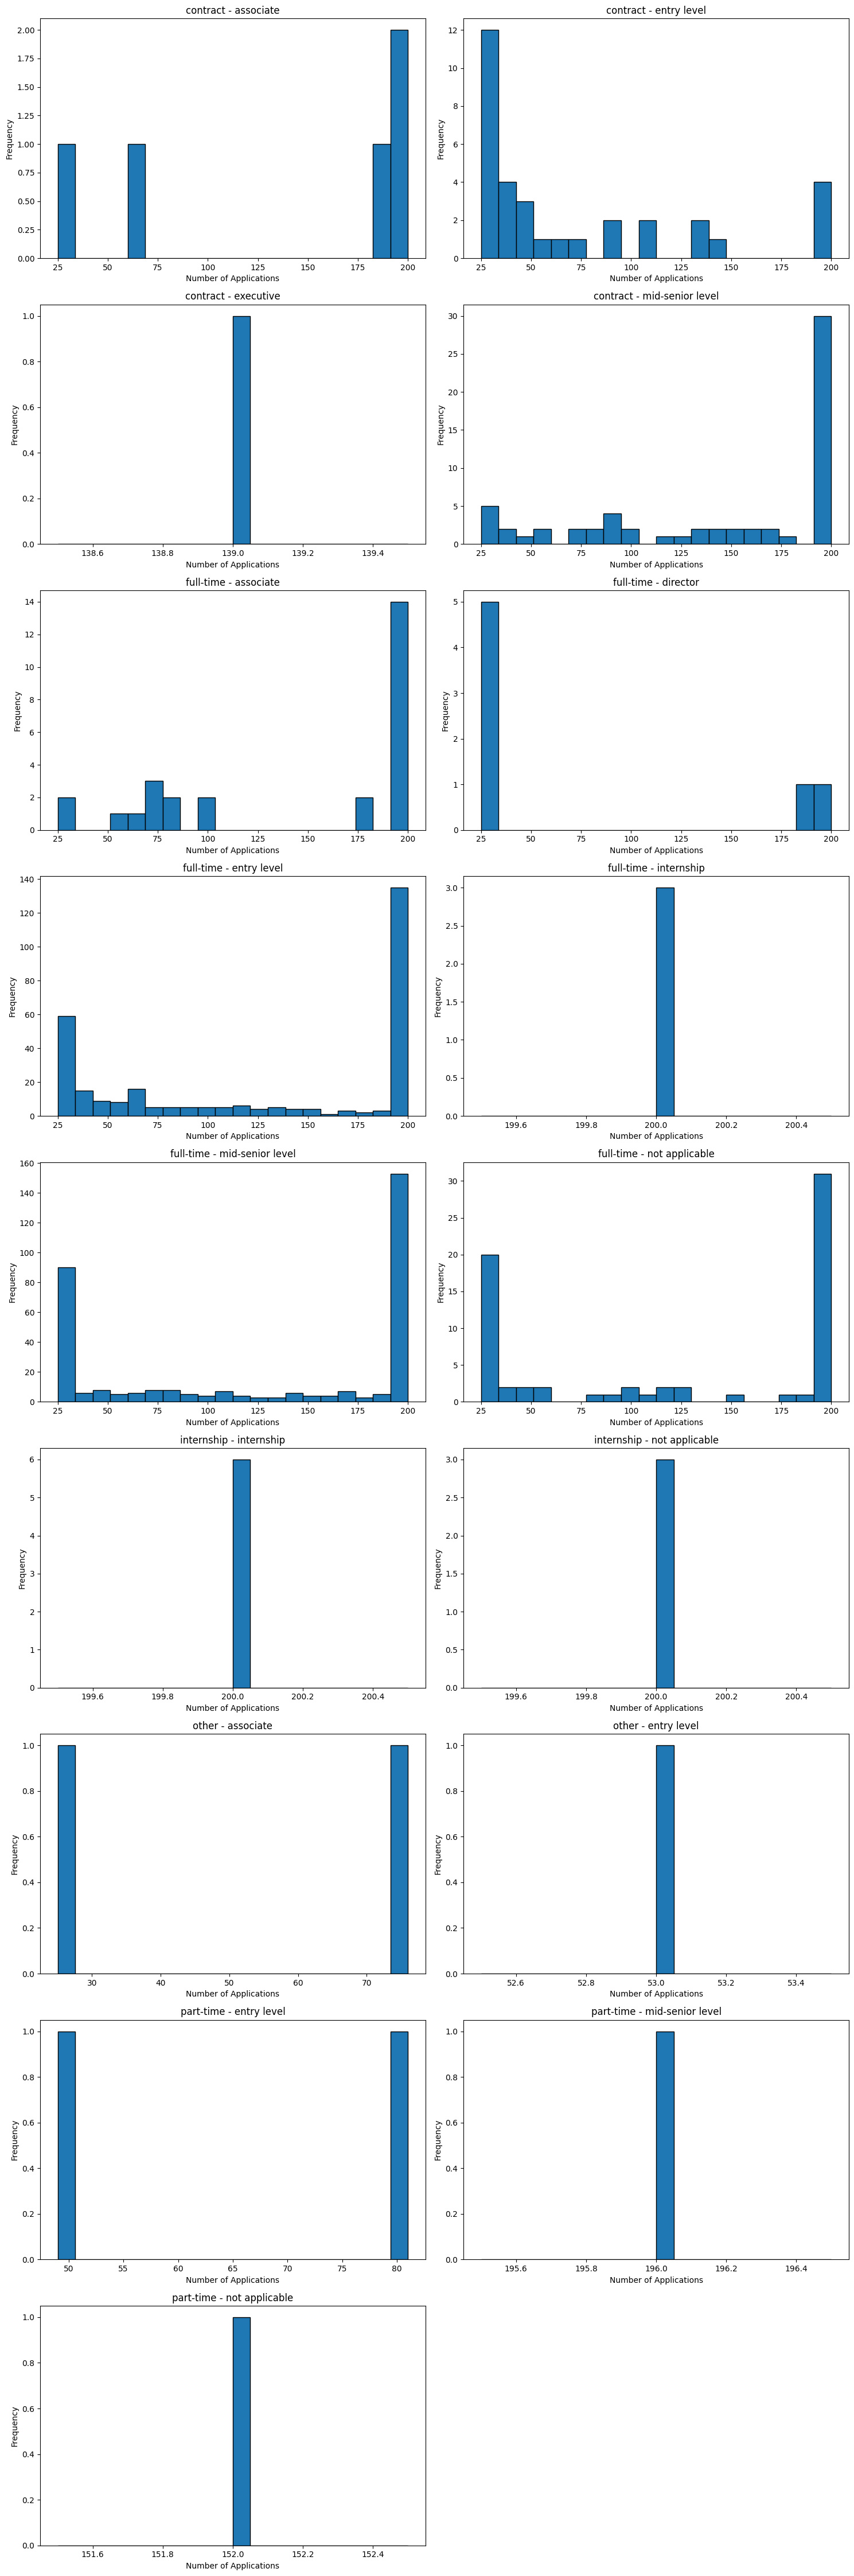


Number of data points for each combination:
contract - associate: 5
contract - entry level: 33
contract - executive: 1
contract - mid-senior level: 63
full-time - associate: 27
full-time - director: 7
full-time - entry level: 299
full-time - internship: 3
full-time - mid-senior level: 339
full-time - not applicable: 69
internship - internship: 6
internship - not applicable: 3
other - associate: 2
other - entry level: 1
part-time - entry level: 2
part-time - mid-senior level: 1
part-time - not applicable: 1


In [15]:
# Group by contractType and experienceLevel
grouped = df.groupby(['contractType', 'experienceLevel'])

# Get unique combinations
combinations = grouped.groups.keys()

# Create subplots grid based on number of combinations
n_combinations = len(combinations)
n_cols = 2
n_rows = (n_combinations + 1) // 2  # Round up division

plt.figure(figsize=(15, 5*n_rows))

num_data_points = {}

# Plot histogram for each combination
for i, (contract, experience) in enumerate(combinations, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Get data for this combination
    data = df[(df['contractType'] == contract) & 
              (df['experienceLevel'] == experience)]['applications']
    
    num_data_points[(contract, experience)] = len(data)
    # Create histogram
    plt.hist(data, bins=20, edgecolor='black')
    
    # Set title and labels
    plt.title(f'{contract} - {experience}')
    plt.xlabel('Number of Applications')
    plt.ylabel('Frequency')
    
    # Adjust layout
    plt.tight_layout()

plt.show()

# Print number of data points for each combination
print("\nNumber of data points for each combination:")
for (contract, experience), count in num_data_points.items():
    print(f"{contract} - {experience}: {count}")


We can see that on linkedin, the post of interships is much smaller than the post of full time jobs, even less than the contract jobs. 

In [16]:
set(df['experienceLevel'])

{'associate',
 'director',
 'entry level',
 'executive',
 'internship',
 'mid-senior level',
 'not applicable'}

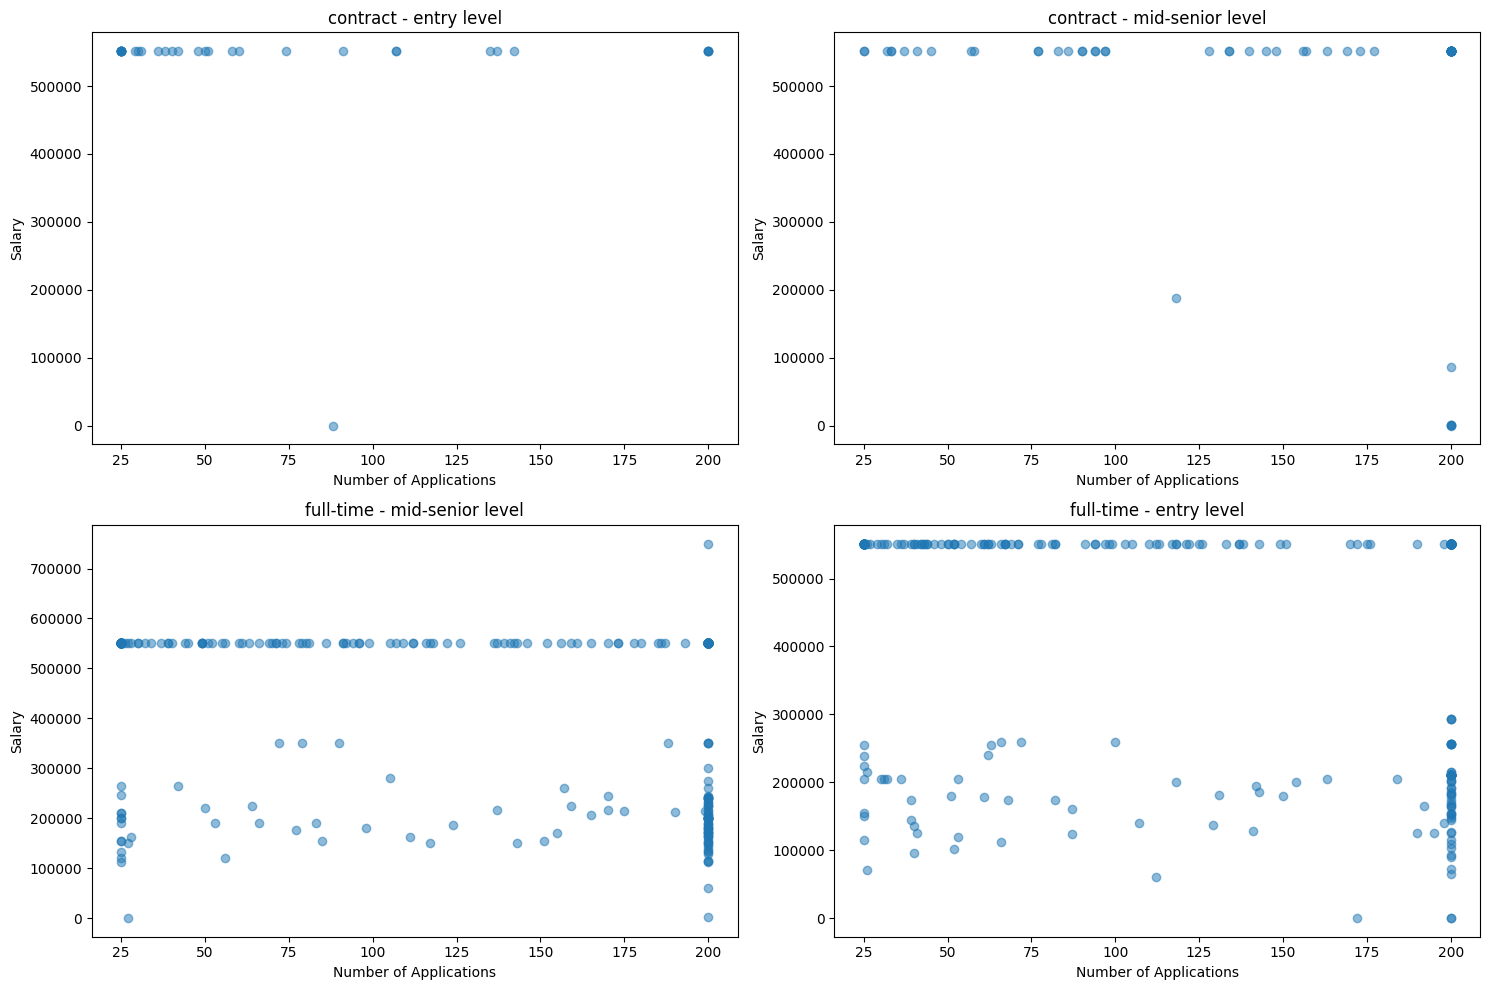

In [17]:
# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Define the combinations we want to analyze
combinations = [
    ('entry level', 'contract',),
    ('mid-senior level', 'contract'), 
    # ('full-time', 'mid-senior level'),
    # ('full-time', 'entry level')
    ('mid-senior level', 'full-time'),
    ('entry level', 'full-time')
]

# Plot scatter plot for each combination
for i, (experience, contract) in enumerate(combinations, 1):
    plt.subplot(2, 2, i)
    
    # Get data for this combination
    mask = (df['contractType'] == contract) & (df['experienceLevel'] == experience)
    data = df[mask]
    
    # Create scatter plot
    plt.scatter(data['applications'], data['salary'], alpha=0.5)
    
    # Set title and labels
    plt.title(f'{contract} - {experience}')
    plt.xlabel('Number of Applications')
    plt.ylabel('Salary')
    
    # Add trend line
    # if len(data) > 1:  # Only add trendline if we have more than one point
    #     z = np.polyfit(data['applications'], data['salary'], 1)
    #     p = np.poly1d(z)
    #     plt.plot(data['applications'], p(data['applications']), "r--", alpha=0.8)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()
